Here we load the data into the memory. (filename: Salary_dataset.csv)


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Salary_dataset.csv to Salary_dataset.csv


This time only numpy is used, with matplotlib as a compatible graph library.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Next we define a numpy datatype and load the data into it.


In [3]:
dtype = [('LineNumber', int), ('YearsExperience', float), ('Salary', float)]
data = np.genfromtxt("Salary_dataset.csv", delimiter=',', skip_header=1, dtype=dtype)

# print(data)

We separate the features (YearsExperience) from the target variable (Salary)

In [4]:
X = data['YearsExperience']
y = data['Salary']

# print(X, y) # if you want to see the result

This function visualizes the point cloud with the linear regression graph

In [12]:
def visualize(theta, X, y):
  plt.scatter(X, y, c='b', marker='o', label='Data Points')
  y_pred = theta[0] + theta[1] * X
  plt.plot(X, y_pred, 'b-', label='Fit Line')
  #plt.xlabel('Years of Experience')
  #plt.ylabel('Salary')
  #plt.title('2D Point Cloud of Salary vs. Years of Experience')
  plt.legend()
  plt.show()

Now we can test the function.

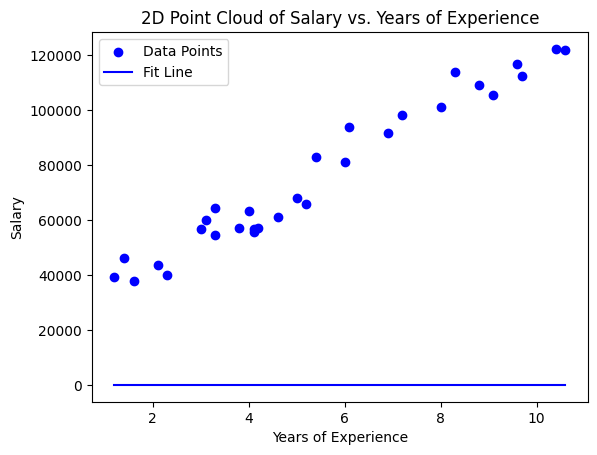

In [6]:
theta = np.zeros(2)
visualize(theta, X, y)

Next we create a function that multiplies each element of the matrix X by the slope of the model (theta[1]), followed by the addition of the intercept of the model (theta[0]), thus producing the predictions of the simple linear regression model.

In [7]:
def predict(X, theta):
  return theta[0] + theta[1] * X

In [8]:
def fit(X, y, theta, alpha, num_iters):
    # Initialize some useful variables
    m = X.shape[0]

    X_b = np.c_[np.ones((m, 1)), X]
    # Loop over the number of iterations
    for _ in range(num_iters):
        predictions = X_b.dot(theta)
        errors = predictions - y
        gradients = (1 / m) * X_b.T.dot(errors)
        theta = theta - alpha * gradients
        # Perform one iteration of gradient descent (i.e., update theta once)
    return theta

To begin, we'll set alpha to 0.01 and num_iters to 1000

In [9]:
theta = np.zeros(2)
finetuned_theta = fit(X, y, theta, 0.01, 1000)
print(finetuned_theta)

[21912.58918422  9880.81400461]


Ok, let's test our function now

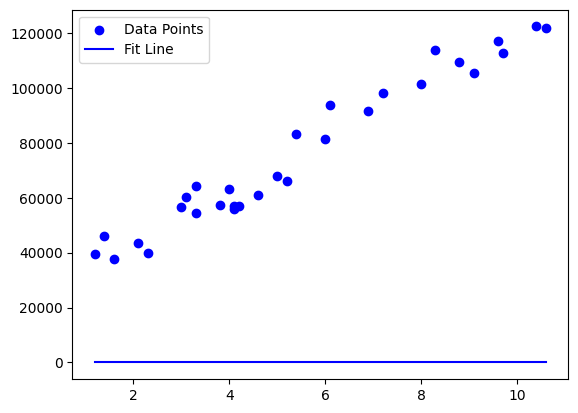

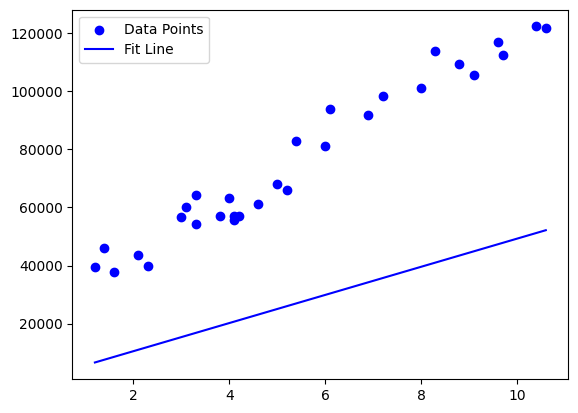

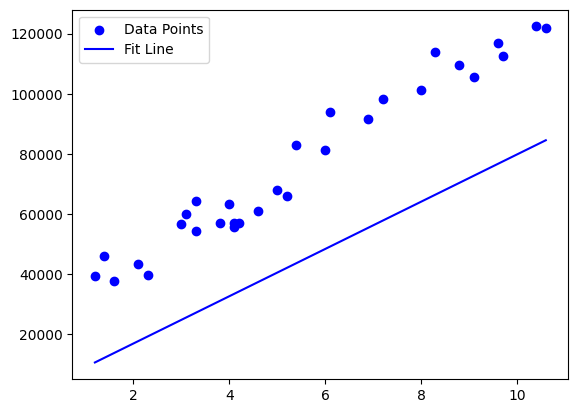

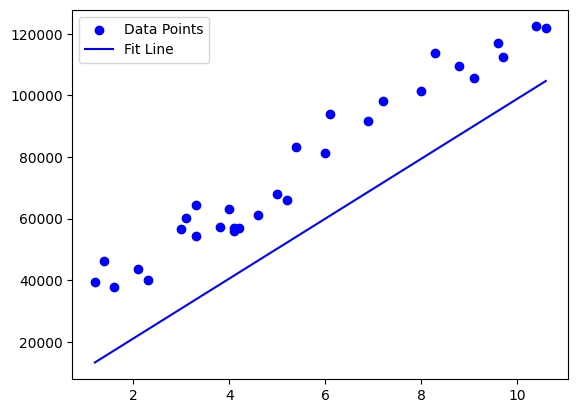

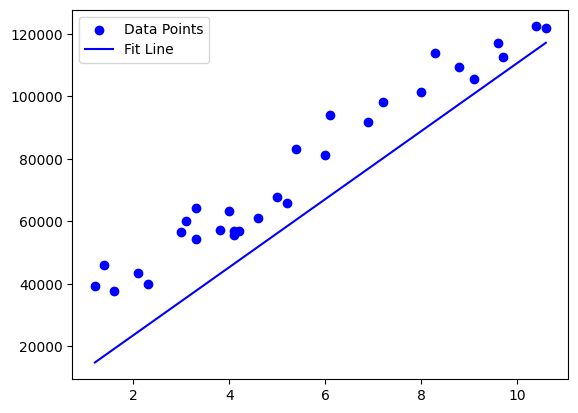

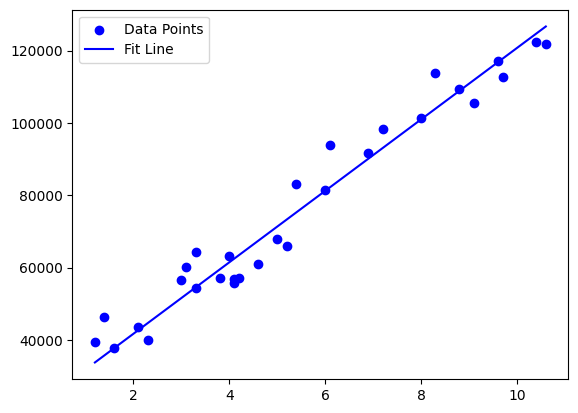

In [13]:
visualize(fit(X, y, theta, 0.01, 0), X, y)
visualize(fit(X, y, theta, 0.01, 1), X, y)
visualize(fit(X, y, theta, 0.01, 2), X, y)
visualize(fit(X, y, theta, 0.01, 3), X, y)
visualize(fit(X, y, theta, 0.01, 4), X, y)
visualize(fit(X, y, theta, 0.01, 1000), X, y)